# implementation algo LSCA

Lowest Single Common Ancestors

**Majeur :**
 * NEW  COMMON  ANCESTOR  PROBLEMS  IN  TREE AND  DIRECTED  ACYCLIC  GRAPHS
         ->  the  “lowest single common ancestor” (LSCA) 
     https://pdfs.semanticscholar.org/71a9/b5dbfde43fe3b40d91e8ca24a49e7638b4f7.pdf
 
 et    page 307 : Summarizing Multiple Gene Trees Using Cluster Networks  
`ftp://nozdr.ru/biblio/kolxo3/Cs/CsLn/Algorithms%20in%20Bioinformatics,%208%20conf.,%20WABI%202008(LNCS5251,%20Springer,%202008)(ISBN%209783540873600)(406s).pdf#page=307')`
 
 
** Stackoverflow **
* Lowest single common ancestor in a Directed Acyclic Graph? : https://cs.stackexchange.com/q/72538
* https://stackoverflow.com/q/14865081/8069403

# Lowest Single Ancestor

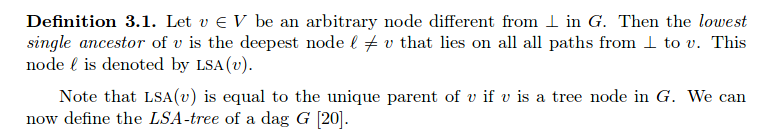

from the citation [20] :
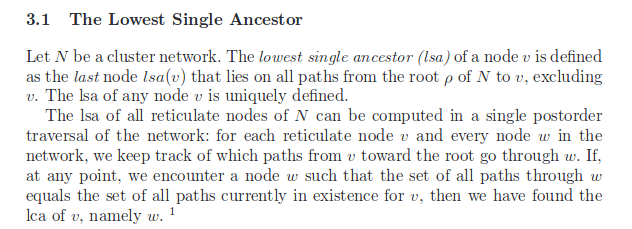


In [168]:
import networkx as nx

import matplotlib.pyplot as plt
%matplotlib inline

In [223]:
G = nx.DiGraph()

G.add_nodes_from( range(10) )

edges = [ (0,1), (0,2), (1,3), (1,4), (2,5), (2,6), (2,3), (2,4), (5,8), (6,8), (6,9), (6,7), (7,9)]
G.add_edges_from( edges )

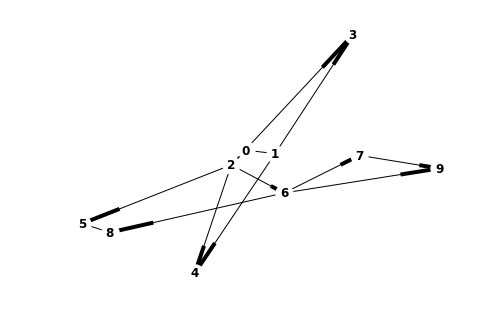

In [224]:
nx.draw(G, with_labels=True, font_weight='bold', node_color= 'white' )
plt.draw()

In [171]:
v = 9

In [172]:
list( nx.all_simple_paths(G, 0, v) )

[[0, 2, 6, 9], [0, 2, 6, 7, 9]]

In [173]:
postorder = nx.dfs_postorder_nodes(G) 

In [174]:
list( nx.dfs_postorder_nodes(G)  )

[3, 4, 1, 8, 5, 9, 7, 6, 2, 0]

In [175]:
list( nx.dfs_postorder_nodes(G, source=0)  )

[3, 4, 1, 8, 5, 9, 7, 6, 2, 0]

In [176]:
list( G.successors(0) )

[1, 2]

https://eli.thegreenplace.net/2015/directed-graph-traversal-orderings-and-applications-to-data-flow-analysis/

In [215]:
# Post-order traversal
is_visited = set()

def postorder( source ):
    is_visited.add( source )
    for n in  G.successors(source):
        if n not in is_visited:
            postorder( n )
            
    print(source, end=', ' )
    
postorder( 0 )

1, 8, 19, 15, 13, 7, 2, 18, 12, 5, 6, 4, 9, 3, 11, 10, 14, 17, 16, 0, 

In [217]:
# All paths - from the roots
# pre-order, depth search
# cith multiple visit possible

allpaths = {}
def followthepath( source, previouspath=[] ):

    path =  list( previouspath )    
    path.append( source )

    if source in allpaths:
        allpaths[source].append( path )
    else:
        allpaths[source] = [ path ]
    
    for n in  G.successors(source):
        followthepath( n, path )
            
followthepath( 0 )
print(len(allpaths))

40


In [218]:
allpaths

{0: [[0]],
 1: [[0, 1]],
 2: [[0, 2]],
 3: [[0, 2, 3], [0, 3]],
 4: [[0, 2, 4], [0, 4]],
 5: [[0, 2, 3, 5], [0, 2, 5], [0, 3, 5], [0, 5]],
 6: [[0, 2, 3, 6], [0, 2, 6], [0, 3, 6], [0, 6]],
 7: [[0, 2, 7], [0, 7]],
 8: [[0, 2, 3, 6, 8],
  [0, 2, 3, 8],
  [0, 2, 6, 8],
  [0, 2, 8],
  [0, 3, 6, 8],
  [0, 3, 8],
  [0, 6, 8],
  [0, 8]],
 9: [[0, 2, 3, 6, 9],
  [0, 2, 3, 9],
  [0, 2, 6, 9],
  [0, 2, 9],
  [0, 3, 6, 9],
  [0, 3, 9],
  [0, 6, 9],
  [0, 9]],
 10: [[0, 2, 4, 10], [0, 2, 10], [0, 4, 10], [0, 10]],
 11: [[0, 2, 3, 6, 11],
  [0, 2, 3, 11],
  [0, 2, 6, 11],
  [0, 2, 11],
  [0, 3, 6, 11],
  [0, 3, 11],
  [0, 6, 11],
  [0, 11]],
 12: [[0, 2, 7, 12], [0, 2, 12], [0, 7, 12], [0, 12]],
 13: [[0, 2, 7, 12, 13],
  [0, 2, 7, 13],
  [0, 2, 12, 13],
  [0, 2, 13],
  [0, 7, 12, 13],
  [0, 7, 13],
  [0, 12, 13],
  [0, 13]],
 14: [[0, 2, 7, 14], [0, 2, 14], [0, 7, 14], [0, 14]],
 15: [[0, 2, 3, 5, 15],
  [0, 2, 3, 15],
  [0, 2, 5, 15],
  [0, 2, 15],
  [0, 3, 5, 15],
  [0, 3, 15],
  [0, 5, 15],
  

In [221]:
allpaths = {}
def followthepath( source, previouspath=[] ):

    path =  list( previouspath )    
    path.append( source )

    if source in allpaths:
        allpaths[source].append( path )
    else:
        allpaths[source] = [ path ]
    
    for n in  G.successors(source):
        followthepath( n, path )
        
followthepath(0)

LSA = {}
n_apparition = lambda v, pathsToNode : sum( [ 1 for path in pathsToNode if v in path ] )

for v in nx.nodes(G):
    pathsToV = allpaths[ v ]
    
    for node in nx.dfs_postorder_nodes(G):
    
        if len( pathsToV ) == n_apparition( node, pathsToV ) and v!=node:
            LSA[ v ] = node
            break
    

In [222]:
LSA

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 0,
 31: 0,
 32: 0,
 33: 0,
 34: 0,
 35: 0,
 36: 0,
 37: 0,
 38: 0,
 39: 0}